# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [4]:
cities

['berlevag',
 'ushuaia',
 'fevralsk',
 'vaini',
 'mataura',
 'butaritari',
 'rio gallegos',
 'hobart',
 'albany',
 'saint-philippe',
 'palabuhanratu',
 'soto',
 'noumea',
 'punta arenas',
 'port alfred',
 'new norfolk',
 'rikitea',
 'marsaxlokk',
 'jamestown',
 'kaitangata',
 'ancud',
 'manicore',
 'goure',
 'sorland',
 'thompson',
 'alegrete',
 'namibe',
 'nikolskoye',
 'manutuke',
 'upernavik',
 'bredasdorp',
 'arraial do cabo',
 'tasiilaq',
 'kununurra',
 'coolum beach',
 'tual',
 'liverpool',
 'isangel',
 'gwadar',
 'alofi',
 'pisco',
 'soderhamn',
 'faanui',
 'atuona',
 'hilo',
 'svetlyy',
 'georgetown',
 'broome',
 'salalah',
 'faya',
 'tiksi',
 'cidreira',
 'busselton',
 'husavik',
 'birao',
 'kyabe',
 'baykit',
 'ingraj bazar',
 'sitka',
 'kurumkan',
 'ballina',
 'puerto ayora',
 'castro',
 'hamilton',
 'kodiak',
 'lavrentiya',
 'grand gaube',
 'le port',
 'khatanga',
 'attawapiskat',
 'bijawar',
 'gazanjyk',
 'narsaq',
 'mahebourg',
 'tuktoyaktuk',
 'karkaralinsk',
 'cape town

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# add headers to .csv file
with open(output_data_file, 'w') as datafile:
    datafile.write("City,Temperature (F),Humidity (%),Clouds(% Cloudy),Windspeed (mph),Latitude,Longitude"+"\n")

In [ ]:
cities_test = ["faribault","northfield","Dundas"]

In [8]:
# Temperature, Humidity, Cloudiness, Windspeed

city_count = 0

for city in cities:
    base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_key}"
    city_count = city_count + 1
    
    try:
        city_url = requests.get(base_url).json()
    #     print(city_url)

        temp = city_url["main"]["temp"]
        humidity = city_url["main"]["humidity"]
        clouds = city_url["clouds"]["all"]
        wind = city_url["wind"]["speed"]
        lat = city_url["coord"]["lat"]
        long = city_url["coord"]["lon"]
        print(f"City #{city_count}: {city}")

        with open(output_data_file, 'a') as datafile:
            datafile.write(f"{city},{temp},{humidity},{clouds},{wind},{lat},{long}"+"\n")

        time.sleep(1)
    except:
        print(f"City #{city_count}: {city} --> NO DATA")


City #1: berlevag
City #2: ushuaia
City #3: fevralsk --> NO DATA
City #4: vaini
City #5: mataura
City #6: butaritari
City #7: rio gallegos
City #8: hobart
City #9: albany
City #10: saint-philippe
City #11: palabuhanratu --> NO DATA
City #12: soto
City #13: noumea
City #14: punta arenas
City #15: port alfred
City #16: new norfolk
City #17: rikitea
City #18: marsaxlokk
City #19: jamestown
City #20: kaitangata
City #21: ancud
City #22: manicore
City #23: goure
City #24: sorland
City #25: thompson
City #26: alegrete
City #27: namibe
City #28: nikolskoye
City #29: manutuke
City #30: upernavik
City #31: bredasdorp
City #32: arraial do cabo
City #33: tasiilaq
City #34: kununurra
City #35: coolum beach
City #36: tual
City #37: liverpool
City #38: isangel
City #39: gwadar
City #40: alofi
City #41: pisco
City #42: soderhamn
City #43: faanui
City #44: atuona
City #45: hilo
City #46: svetlyy
City #47: georgetown
City #48: broome
City #49: salalah
City #50: faya
City #51: tiksi
City #52: cidreira
C

City #388: linqiong
City #389: pszczyna
City #390: lasa
City #391: brawley
City #392: college
City #393: lashio
City #394: ugoofaaru
City #395: arthur
City #396: evensk
City #397: chuy
City #398: marcona --> NO DATA
City #399: cananeia
City #400: burnie
City #401: kainantu
City #402: jiddah --> NO DATA
City #403: pitimbu
City #404: palmer
City #405: wellington
City #406: dayong
City #407: itoman
City #408: hirara
City #409: pringsewu
City #410: monrovia
City #411: bukoba
City #412: westport
City #413: diffa
City #414: stornoway
City #415: mar del plata
City #416: fasa
City #417: songea
City #418: vestmanna
City #419: talara
City #420: necochea
City #421: tuy hoa
City #422: andrews
City #423: yeniseysk
City #424: waddan
City #425: vanderhoof
City #426: superior
City #427: ilebo
City #428: yeysk
City #429: ayan
City #430: puerto penasco
City #431: tilichiki
City #432: tsiroanomandidy
City #433: inhambane
City #434: pemangkat
City #435: north bend
City #436: liapades --> NO DATA
City #437

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Name of the CSV file
weather_file = 'output_data/cities.csv'

In [14]:
# The correct encoding must be used to read the CSV in pandas
weather_df = pd.read_csv(weather_file)
weather_df.sort_values(by="Humidity (%)", ascending=False).head()

,City,Temperature (F),Humidity (%),Clouds(% Cloudy),Windspeed (mph),Latitude,Longitude
350,nantucket,34.34,100,90,11.50,41.2835,-70.0995
221,williamsburg,37.26,100,75,5.75,37.2707,-76.7075
125,gat,58.03,100,0,4.92,31.6100,34.7642
196,grants pass,35.08,100,90,1.03,42.4390,-123.3284
86,airai,60.64,100,100,2.86,-8.9266,125.4092


## Inspect the data and remove the cities where the humidity > 100%.
----
Based on the view of the DataFrame abobe, there are no cities with a humidity greater than 100%.

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

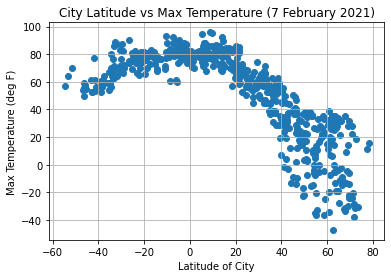

In [26]:
x_values = weather_df["Latitude"]
y_values_temp = weather_df["Temperature (F)"]

plt.scatter(x_values, y_values_temp)
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Max Temperature (deg F)")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

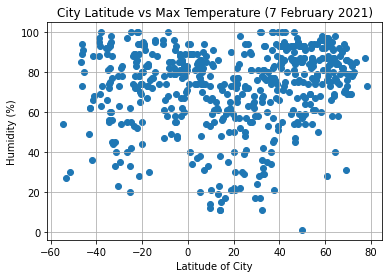

In [28]:
y_values_humidity = weather_df["Humidity (%)"]

plt.scatter(x_values, y_values_humidity)
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Humidity (%)")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

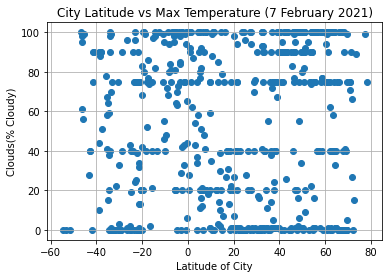

In [29]:
y_values_clouds = weather_df["Clouds(% Cloudy)"]

plt.scatter(x_values, y_values_clouds)
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Clouds(% Cloudy)")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

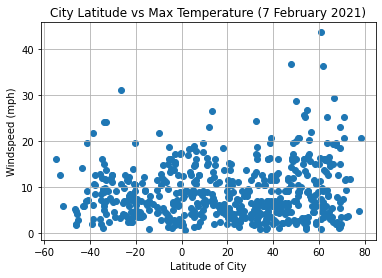

In [30]:
y_values_clouds = weather_df["Windspeed (mph)"]

plt.scatter(x_values, y_values_clouds)
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Windspeed (mph)")
plt.grid()

plt.show()

## Linear Regression

A series of linear regressions that breakdown temperature as function of latitude

In [33]:
# Northern Climes
northern_df = weather_df.loc[weather_df["Latitude"] > 0]
northern_df.head()

,City,Temperature (F),Humidity (%),Clouds(% Cloudy),Windspeed (mph),Latitude,Longitude
0,berlevag,22.06,79,75,20.71,70.8578,29.0864
4,butaritari,80.64,81,43,18.21,3.0707,172.7902
7,albany,26.87,75,100,4.45,42.6001,-73.9662
15,marsaxlokk,62.82,77,0,10.36,35.8419,14.5431
16,jamestown,19.04,73,90,16.11,42.0970,-79.2353


In [34]:
southern_df = weather_df.loc[weather_df["Latitude"] < 0]
southern_df.head()

,City,Temperature (F),Humidity (%),Clouds(% Cloudy),Windspeed (mph),Latitude,Longitude
1,ushuaia,57.20,54,0,16.11,-54.8000,-68.3000
2,vaini,77.00,94,75,8.05,-21.2000,-175.2000
3,mataura,50.13,89,98,1.70,-46.1927,168.8643
5,rio gallegos,69.80,30,0,5.75,-51.6226,-69.2181
6,hobart,52.54,62,40,5.75,-42.8794,147.3294


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

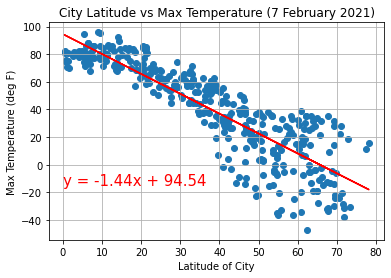

In [38]:
x_values_north = northern_df["Latitude"]
y_values_ntemp = northern_df["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_ntemp)
regress_values_ntemp = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_ntemp)
plt.plot(x_values_north,regress_values_ntemp,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Max Temperature (deg F)")
plt.grid()

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

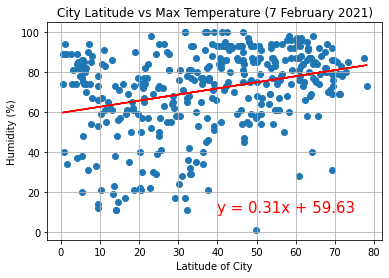

In [42]:
y_values_nhumidity = northern_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_nhumidity)
regress_values_nhumidity = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_nhumidity)
plt.plot(x_values_north,regress_values_nhumidity,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Humidity (%)")
plt.grid()

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

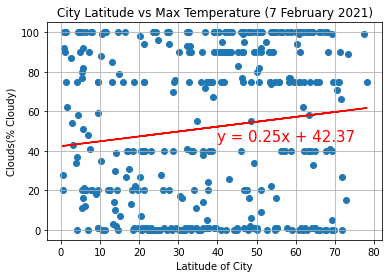

In [45]:
y_values_nclouds = northern_df["Clouds(% Cloudy)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_nclouds)
regress_values_nclouds = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_nclouds)
plt.plot(x_values_north,regress_values_nclouds,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Clouds(% Cloudy)")
plt.grid()

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

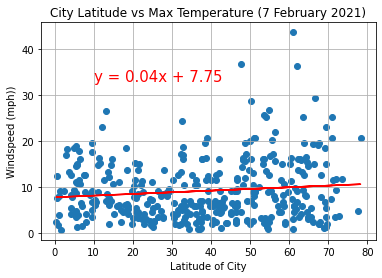

In [49]:
y_values_nwind = northern_df["Windspeed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_nwind)
regress_values_nwind = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north, y_values_nwind)
plt.plot(x_values_north,regress_values_nwind,"r-")
plt.annotate(line_eq,(10,33),fontsize=15,color="red")
plt.title(label="City Latitude vs Max Temperature (7 February 2021)")
plt.xlabel(xlabel="Latitude of City")
plt.ylabel(ylabel="Windspeed (mph))")
plt.grid()

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression